Image shape: (2048, 2048, 3)


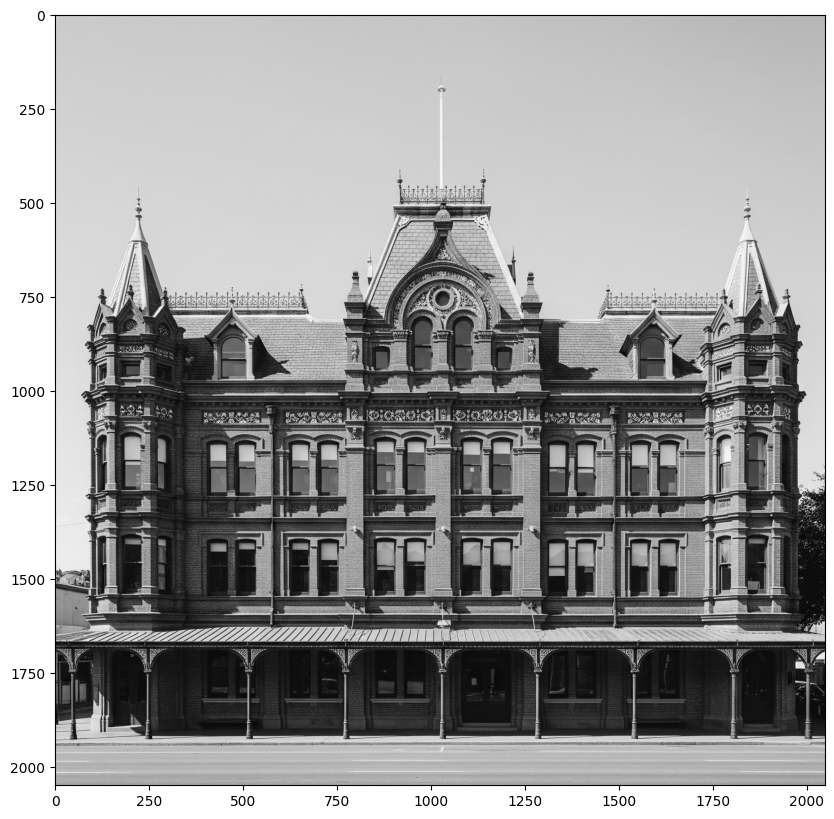

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('building.jpg')
# Change to RGB format for displaying with matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_grey = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

print(f"Image shape: {image.shape}")

plt.figure(figsize=(10, 10))
plt.imshow(image_grey, cmap='gray')
plt.show()

In [24]:
# Corner feature detection
image_with_corners = image.copy()
corners = cv2.goodFeaturesToTrack(image_grey, maxCorners=150, qualityLevel=0.01, minDistance=50)
# Corners is a list of point coordinates that are each wrapped in an array.
print(corners.shape)
print(corners)


(150, 1, 2)
[[[ 190. 1053.]]

 [[2032. 1346.]]

 [[2003. 1608.]]

 [[1987. 1285.]]

 [[1980. 1437.]]

 [[1857.  884.]]

 [[1842. 1154.]]

 [[ 916. 1067.]]

 [[1266. 1563.]]

 [[1101. 1066.]]

 [[1985. 1498.]]

 [[ 197.  826.]]

 [[  90.  839.]]

 [[1017.  572.]]

 [[1027.  688.]]

 [[ 983.  749.]]

 [[1444.  802.]]

 [[  90.  928.]]

 [[ 692. 1069.]]

 [[1845. 1061.]]

 [[ 841. 1064.]]

 [[ 137. 1189.]]

 [[ 790.  696.]]

 [[2044. 1264.]]

 [[1471.  719.]]

 [[1107.  774.]]

 [[ 137.  751.]]

 [[2009. 1776.]]

 [[1127.  561.]]

 [[1940. 1056.]]

 [[ 511. 1883.]]

 [[ 400. 1068.]]

 [[1818. 1744.]]

 [[1168. 1064.]]

 [[1529. 1172.]]

 [[ 453. 1067.]]

 [[ 278.  834.]]

 [[1295. 1080.]]

 [[ 656.  717.]]

 [[1156.  791.]]

 [[ 758. 1075.]]

 [[1491. 1619.]]

 [[ 923.  543.]]

 [[ 242. 1883.]]

 [[1628. 1077.]]

 [[1788. 1302.]]

 [[ 769.  764.]]

 [[ 753. 1158.]]

 [[1273.  698.]]

 [[2023. 1713.]]

 [[1296.  765.]]

 [[ 230.  888.]]

 [[ 684.  813.]]

 [[1881.  732.]]

 [[1769.  754.]]

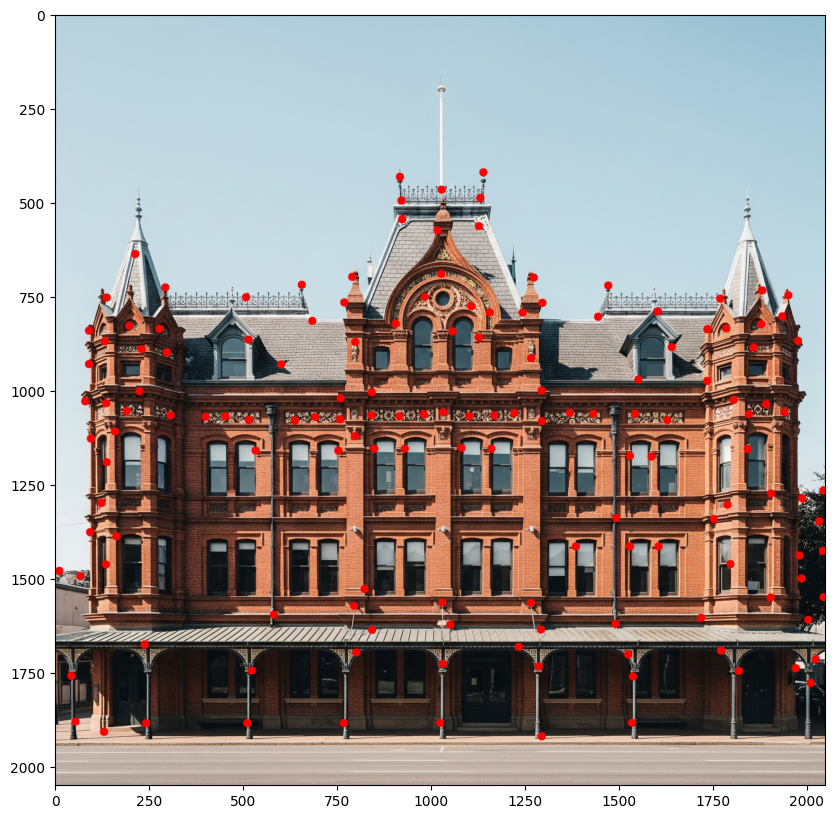

In [25]:
for corner in corners:
    x, y = int(corner[0][0]), int(corner[0][1])
    # Draw red dots at each corner location (-1 = solid fill)
    cv2.circle(image_with_corners, (x, y), 11, (255, 0, 0), -1)
plt.figure(figsize=(10, 10))
plt.imshow(image_with_corners)
plt.show()

Number of keypoints detected: 795


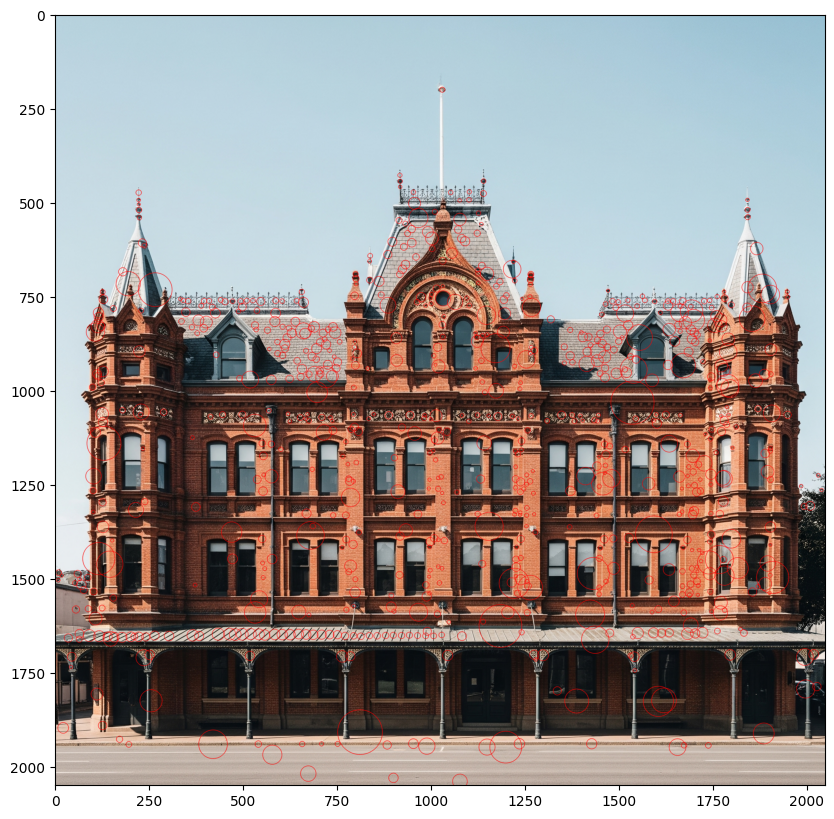

In [29]:
# Find blob features

params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 50
params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False

detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(image_grey)
print(f"Number of keypoints detected: {len(keypoints)}")
image_with_keypoints = cv2.drawKeypoints(image, keypoints, np.array([]), (255, 0, 0),
                                         cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10, 10))
plt.imshow(image_with_keypoints)
plt.show()


